Analysis of radiative data at station 'ACME'

In [2]:
# importing necessary modules
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# downward shortwave radiation at surface at station 'ACME: dswrfs'
dswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\DSWRF\\dswrf_station.csv", header=None)
# downward longwave radiation at surface at station 'ACME: dlwrfs'
dlwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\DLWRF\\dlwrf_station.csv", header=None)
# upward shortwave radiation at surface at station 'ACME: uswrfs'
uswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\USWRF_sfc\\uswrfs_station.csv", header=None)
# upward longwave radiation at surface at station 'ACME: ulwrfs'
ulwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\ULWRF_sfc\\ulwrfs_station.csv", header=None)
# upward longwave radiation at top of the atmosphere (TOA) over station 'ACME': ulwrf
ulwrf = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\ULWRF\\ulwrf_station.csv", header=None)

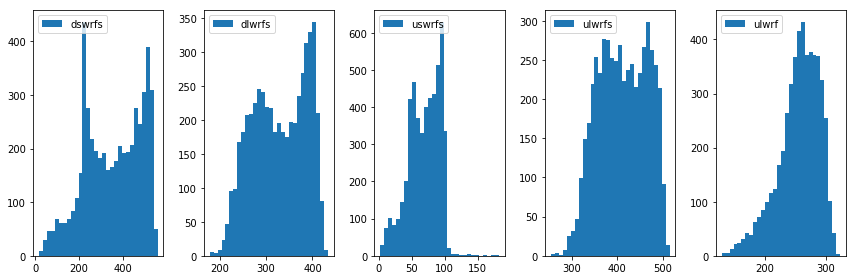

standard deviation:
DSWRFS: 130.3778187872403 , DLWRFS: 57.81892631941613 , USWRFS: 23.83536353113062 , ULWRFS: 52.77471736508732 , ULWRF: 33.947500694335886
arithmatic mean:
DSWRFS: 350.8349746722091 , DLWRFS: 329.0505199769221 , USWRFS: 68.97087280911391 , ULWRFS: 410.9800223326822 , ULWRF: 255.68339747330316


In [18]:
# Histograms of all the flux to see frequency distribution from 14 years of data

fig, axes = plt.subplots(nrows=1, ncols=5)
ax0, ax1, ax2, ax3, ax4 = axes.flatten()
n_bins = 30
ax0.hist(dswrfs[0], n_bins, histtype='bar', label='dswrfs')
ax0.legend(loc='upper left')

ax1.hist(dlwrfs[0], n_bins, histtype='bar', label='dlwrfs')
ax1.legend(loc='upper left')

ax2.hist(uswrfs[0], n_bins, histtype='bar', label='uswrfs')
ax2.legend(loc='upper left')

ax3.hist(ulwrfs[0], n_bins, histtype='bar', label='ulwrfs')
ax3.legend(loc='upper left')

ax4.hist(ulwrf[0], n_bins, histtype='bar', label='ulwrf')
ax4.legend(loc='upper left')

fig.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = [12,4]


# standard deviation of radiative flux:
print('standard deviation:')
print('DSWRFS:', dswrfs.stack().std(), ', DLWRFS:', dlwrfs.stack().std(), ', USWRFS:', uswrfs.stack().std(), ', ULWRFS:', ulwrfs.stack().std(), ', ULWRF:', ulwrf.stack().std())
# Arithmatic mean of radiative flux:
print('arithmatic mean:')
print('DSWRFS:', dswrfs[0].mean(), ', DLWRFS:', dlwrfs[0].mean(), ', USWRFS:', uswrfs[0].mean(), ', ULWRFS:', ulwrfs[0].mean(), ', ULWRF:', ulwrf[0].mean())


downward shortwave energy has maximum deviation.

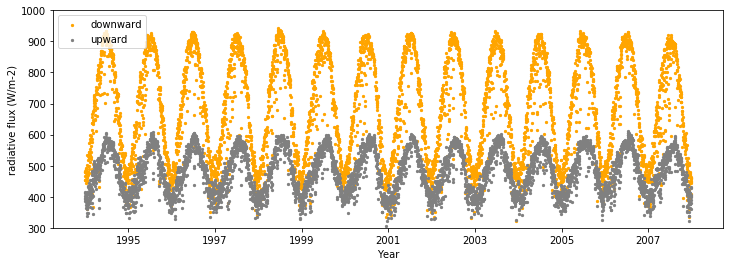

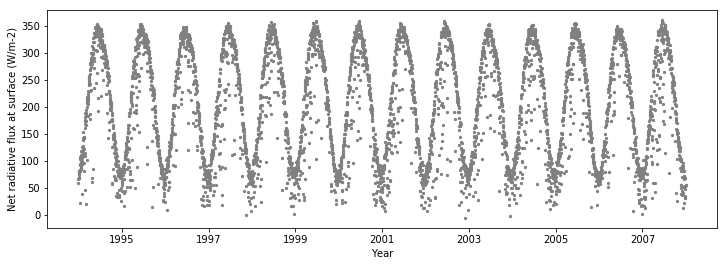

In [19]:
#total downward radiation flux at surface at station 'ACME: drf'
down = dswrfs + dlwrfs
#total upward radiation flux at surface at station 'ACME: urf'
up = uswrfs + ulwrfs

# Net radiation at surface = total dowanward radiation - total upward radiation : rs
rs = down - up
#print(rs)
dates = np.arange(np.datetime64('1994-01-01'), np.datetime64('2008-01-01'))
dates[:365]
# plot time series of upward and downward radiation
plt.scatter(dates, down, s=5, marker='o', color='orange' , label='downward')
plt.scatter(dates, up, s=5, marker='o', color='gray', label='upward')
plt.xlabel('Year')
plt.ylabel('radiative flux (W/m-2)')
plt.ylim(300, 1000)
plt.legend(loc='upper left')
plt.show()
# plot net radiation at surface
plt.scatter(dates, rs, s=5, marker='o', color='gray', label='upward')
plt.xlabel('Year')
plt.ylabel('Net radiative flux at surface (W/m-2)')
plt.show()


We have radiative flux for downward and upward radiation. We want to examine how these are related. First they are averaged over 14 years ( jan 1 from all 14 years and so on). 

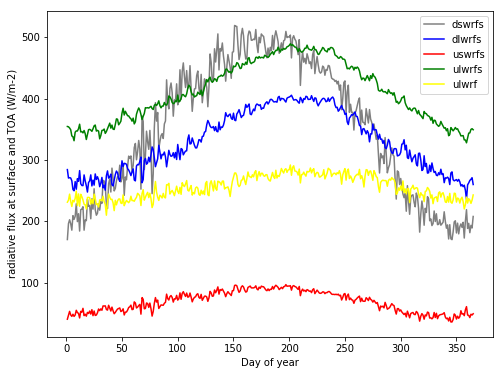

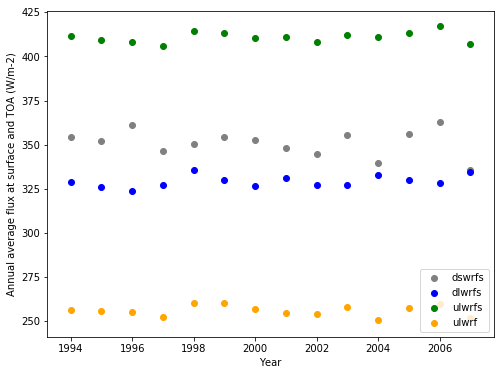

In [21]:
# for all radiative type
file = [dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf]
avg_rf = pd.DataFrame()
annual_rf = pd.DataFrame()
for j in range(5):
    rf = file[j]
    #Averaging radiative flux over each day in the year: avg_rf
    # Annual average of flux: annual_rf
    # days in year from 1994 to 2007: leap year- 1996, 2000, 2004
    d = [365, 730, 1096, 1461, 1826, 2191, 2557, 2922, 3287, 3652, 4018, 4383, 4748, 5113]

    yr = rf[:365]

    for i in range(2007 - 1994):
        #print(d[i], d[i+1])
        yr1 = rf[d[i]:d[i+1]]
        yr1.reset_index(inplace=True, drop=True)
        yr = pd.concat([yr, yr1], axis=1)
    a = list(range(1994, 2008))
    yr = yr[:365]
    yr.columns = a

    avg_yr = yr.mean(axis=1)
    annual_avg = yr.mean(axis=0)
    #print(type(avg_yr))
    avg_rf = pd.concat([avg_rf, avg_yr], axis=1)
    annual_rf = pd.concat([annual_rf, annual_avg], axis=1)
avg_rf.columns = ['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf']
annual_rf.columns = ['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf']
#print(annual_rf)

days = list(range(1, 366))
plt.plot(days, avg_rf['dswrfs'], color='gray', label='dswrfs')
plt.plot(days, avg_rf['dlwrfs'], color='blue', label='dlwrfs')
plt.plot(days, avg_rf['uswrfs'], color='red', label='uswrfs')
plt.plot(days, avg_rf['ulwrfs'], color='green', label='ulwrfs')
plt.plot(days, avg_rf['ulwrf'], color='yellow', label='ulwrf')
plt.xlabel('Day of year')
plt.ylabel('radiative flux at surface and TOA (W/m-2)')
plt.legend(loc='upper right')
#plt.figure(figsize=(3,4))
plt.rcParams["figure.figsize"] = [8,6]
plt.show()

# Any trend in annual average values?? Not apperant from the plot
year = list(range(1994, 2008))
plt.scatter(year, annual_rf['dswrfs'], color='gray', label='dswrfs')
plt.scatter(year, annual_rf['dlwrfs'], color='blue', label='dlwrfs')
#plt.scatter(year, annual_rf['uswrfs'], color='red', label='uswrfs')
plt.scatter(year, annual_rf['ulwrfs'], color='green', label='ulwrfs')
plt.scatter(year, annual_rf['ulwrf'], color='orange', label='ulwrf')
plt.xlabel('Year')
plt.ylabel('Annual average flux at surface and TOA (W/m-2)')
plt.legend(loc='lower right')
plt.show()


Shortwave radiation (visible light) contains a lot of energy; longwave radiation (infrared light) contains less energy than shortwave radiation (shortwave radiation has a shorter wavelength than longwave radation). Solar energy enters our atmosphere as shortwave radiation in the form of ultraviolet (UV) rays (the ones that give us sunburn) and visible light.  The sun emits shortwave radiation because it is extremely hot and has a lot of energy to give off.  Once in the Earth’s atmosphere, clouds and the surface absorb the solar energy.  The ground heats up and re-emits energy as longwave radiation in the form of infrared rays.  Earth emits longwave radiation because Earth is cooler than the sun and has less energy available to give off. 

All of them have seasonality: higher in summer and lower in winter. However, the peaks of short and long waves correspond to different time of year. That means that peak in re-emitted energy is off-set from the peak of direct emitted solar energy. 


Index(['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf'], dtype='object')


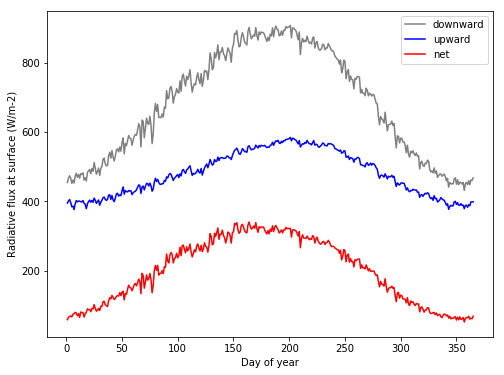

In [22]:
print(avg_rf.columns)
dn = avg_rf['dswrfs'] + avg_rf['dlwrfs']
up = avg_rf['uswrfs'] + avg_rf['ulwrfs']

# Net radiation at surface, downward flux - upward flux at surface: nrs
nrs = dn - up

plt.plot(days, dn, color='gray', label='downward')
plt.plot(days, up, color='blue', label='upward')
plt.plot(days, nrs, color='red', label='net')
plt.xlabel('Day of year')
plt.ylabel('Radiative flux at surface (W/m-2)')
plt.legend(loc='upper right')
#plt.rcParams["figure.figsize"] = [8,6]
plt.show()


Both the downward and upward flux has seasonality: with higher flux in summer and lower flux in winter. That is obvious as during summer more radiative flux is received at surface. The upward flux depends on how heated the surface becomes.

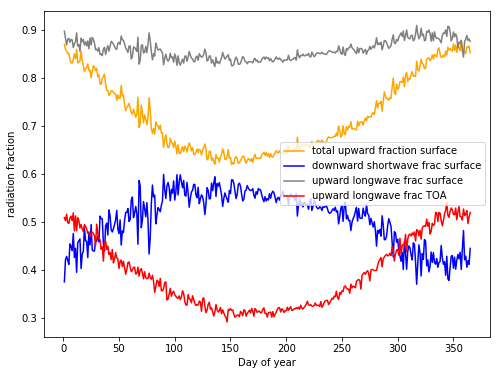

In [23]:
# what fraction of downward radiation is reemitted from surface? ans: upward radiation / downward radiation
up_frac = up/dn

# what fraction of incomng radiation is shortwave and what fraction of upward radiation is long wave?
ds_by_dn = avg_rf['dswrfs']/dn
ul_by_up = avg_rf['ulwrfs']/up

# what fraction of incoming at surface goes back to the top of the atmosphere? ulwrfs/ulwrf
fr_atm_s = avg_rf['ulwrf']/dn

# plotting them
plt.plot(days, up_frac, color='orange', label='total upward fraction surface')
plt.plot(days, ds_by_dn, color='blue', label='downward shortwave frac surface')
plt.plot(days, ul_by_up, color='gray', label='upward longwave frac surface')
plt.plot(days, fr_atm_s, color='red', label = 'upward longwave frac TOA')
plt.legend(loc='center right')
plt.xlabel('Day of year')
plt.ylabel('radiation fraction')
plt.show()


While the downward radiation (in blue) has significant amount of longwave radiation (probably due to presence of atmospheric particle, cloud), upward radiation (in gray) almost entirely due to longwave radiation. Upward ~ synnonymous to longwave radiation. The fraction of radiation at the top of atmosphere is high in winter and low in summer. In summer more energy is retained near the surface.